In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
# Load dataset
df = pd.read_csv('/kaggle/input/electricity-bill/electricity_bill_dataset.csv')
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [5]:
#  Step 1: Data Inspection
# -------------------------
print(df.info())
print(df.describe())
print(df.isnull().sum())  # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB
None
                Fan  Refrigerator  AirConditioner    Television       Monitor  \
count  45345.000000  45345.000000    45345.000000  45345.000000  45345.000000   
mean      13.99069

In [8]:
# Step 1.1: Handling Missing Values
# Check for missing values
print(df.isnull().sum())

# Fill numerical columns with the median or mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Impute or drop missing categorical values
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Step 1.2: Encoding Categorical Variables
# If there are categorical variables, use pd.get_dummies() or LabelEncoder
data = pd.get_dummies(df, drop_first=True)

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


In [9]:
# Select the specific feature and target
X = df[['MonthlyHours']]  # Feature
y = df['ElectricityBill']  # Target

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

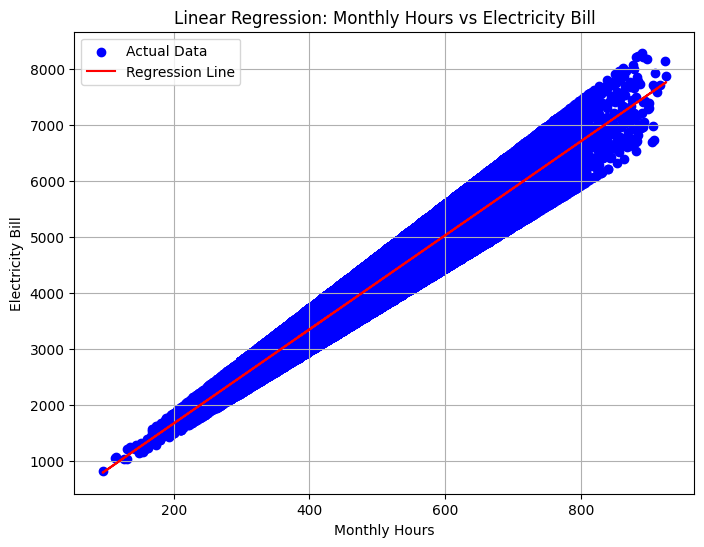

In [12]:
# Predict values across the entire dataset for visualization
y_pred_line = model.predict(X)

# Plotting the regression line and actual data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_line, color='red', label='Regression Line')
plt.xlabel('Monthly Hours')
plt.ylabel('Electricity Bill')
plt.title('Linear Regression: Monthly Hours vs Electricity Bill')
plt.legend()
plt.grid(True)
plt.show()